In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import time
from DataLoader import DataLoader
from Model import Net
from EarlyStop import EarlyStopping
USE_GPU = True
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

LOAD_DATA = True
BATCH_SIZE = 10
VAL_BATCH_SIZE = 2
LEARNING_RATE = 1e-3
EPOCHS = 50
PATIENCE = 20
VALIDATE_EVERY = 10
MODEL_NAME = f"model-{int(time.time())}"


cpu


In [2]:
if LOAD_DATA:
    trainpath = 'traindata(small).xlsx'
    valpath = 'valdata(small).xlsx'
    testpath = 'testdata(small).xlsx'
    
    traindata = DataLoader(batch_size = BATCH_SIZE, path = trainpath)
    valdata = DataLoader(batch_size = VAL_BATCH_SIZE, path = valpath)
#traindata.makeimage(10)

100
10


In [3]:
def train(net, model_name, patience, validate_every):
    
    optimizer = optim.Adam(net.parameters(), LEARNING_RATE, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
    loss_function = nn.MSELoss()
    
    train_losses = []
    val_losses = []
    avg_train_losses = []
    avg_val_losses = []
    early_stopping = EarlyStopping(patience=patience, verbose=True)

    with open("model.log", "a") as f:
        for epoch in tqdm(range(EPOCHS)):
                net.train()
                for idx in range(traindata.getbatchnum()):
                    x, y = traindata.getbatch()
                    x = x.view(-1, 1, 64, 64)

                    net.zero_grad()
                    pred = net(x)
                    loss = loss_function(pred, y)
                    loss.backward()
                    optimizer.step()
                    
                    error = (pred - y) / y
                    error = error.mean(0)
                    train_losses.append(loss.item())
                    
                    #if idx%validate_every == 0:
                net.eval()
                for ii in range(valdata.getbatchnum()):
                    val_x, val_y = valdata.getbatch()
                    val_x = val_x.view(-1, 1, 64, 64)
                    val_pred = net(val_x)
                    val_loss = loss_function(val_pred, val_y)
                    val_error = (val_pred - val_y) / val_y
                    val_error = val_error.mean(0)
                    val_losses.append(val_loss.item())
                    
                train_loss = np.average(train_losses)
                valid_loss = np.average(val_losses)
                avg_train_losses.append(train_loss)
                avg_val_losses.append(valid_loss)
                
                train_losses = []
                val_losses = []
                
                f.write(f"{MODEL_NAME},{round(time.time(),3)},  {round(float(loss), 4)},  {round(float(val_loss),4)}\n")
                print("batch : ", idx)
                print("loss : ", loss, "\nval loss : ", val_loss, "\n")
                print("error : ", error, "\nval error : ", val_error)
                
                early_stopping(valid_loss, net)
                
                if early_stopping.early_stop:
                    print("Early stopping")
                    break
        # load the last checkpoint with the best model
        net.load_state_dict(torch.load('checkpoint.pt'))
        
        return avg_train_losses, avg_val_losses

In [4]:
traindata.reset()
valdata.reset()
net = Net()
train_loss, valid_loss = train(net, MODEL_NAME, PATIENCE, VALIDATE_EVERY)

  2%|█▋                                                                                 | 1/50 [00:01<01:15,  1.55s/it]

batch :  9
loss :  tensor(55.3581, grad_fn=<MseLossBackward>) 
val loss :  tensor(44.6763, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.1018,  0.7060, -0.0155,  0.0507,  1.1793], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.4376, -0.2467, -0.6731, -0.4270,  3.6726], grad_fn=<MeanBackward1>)
Validation loss decreased (inf --> 38.716832).  Saving model ...


  4%|███▎                                                                               | 2/50 [00:03<01:15,  1.58s/it]

batch :  9
loss :  tensor(40.1368, grad_fn=<MseLossBackward>) 
val loss :  tensor(24.0923, grad_fn=<MseLossBackward>) 

error :  tensor([-0.5328, -0.4329, -0.3107, -0.2334, -0.6434], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.4850, -0.5258, -0.5132,  0.1477,  0.1815], grad_fn=<MeanBackward1>)
Validation loss decreased (38.716832 --> 20.803122).  Saving model ...


  6%|████▉                                                                              | 3/50 [00:04<01:12,  1.55s/it]

batch :  9
loss :  tensor(33.2129, grad_fn=<MseLossBackward>) 
val loss :  tensor(22.9558, grad_fn=<MseLossBackward>) 

error :  tensor([-0.3613, -0.2662, -0.2997, -0.6847, -0.4911], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.3793, -0.4661, -0.6007, -0.3717,  0.9914], grad_fn=<MeanBackward1>)
Validation loss decreased (20.803122 --> 19.002222).  Saving model ...


  8%|██████▋                                                                            | 4/50 [00:06<01:10,  1.53s/it]

batch :  9
loss :  tensor(28.7007, grad_fn=<MseLossBackward>) 
val loss :  tensor(23.7995, grad_fn=<MseLossBackward>) 

error :  tensor([-0.3187, -0.2952, -0.3844, -0.3089, -0.3172], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.3766, -0.4142, -0.6460, -0.1179,  1.4248], grad_fn=<MeanBackward1>)
Validation loss decreased (19.002222 --> 18.895678).  Saving model ...


 10%|████████▎                                                                          | 5/50 [00:07<01:08,  1.53s/it]

batch :  9
loss :  tensor(29.7099, grad_fn=<MseLossBackward>) 
val loss :  tensor(23.2235, grad_fn=<MseLossBackward>) 

error :  tensor([-0.3077, -0.2789, -0.2090, -0.0753, -0.3306], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.4229, -0.4584, -0.5817,  0.0069,  1.0776], grad_fn=<MeanBackward1>)
Validation loss decreased (18.895678 --> 18.612741).  Saving model ...


 12%|█████████▉                                                                         | 6/50 [00:09<01:07,  1.53s/it]

batch :  9
loss :  tensor(25.7517, grad_fn=<MseLossBackward>) 
val loss :  tensor(22.8247, grad_fn=<MseLossBackward>) 

error :  tensor([-0.2640, -0.2407, -0.2859, -0.2302, -0.4957], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.4133, -0.4804, -0.5685, -0.0367,  0.9053], grad_fn=<MeanBackward1>)
Validation loss decreased (18.612741 --> 18.568172).  Saving model ...


 14%|███████████▌                                                                       | 7/50 [00:10<01:04,  1.50s/it]

batch :  9
loss :  tensor(36.2261, grad_fn=<MseLossBackward>) 
val loss :  tensor(25.4744, grad_fn=<MseLossBackward>) 

error :  tensor([-0.4224, -0.3909, -0.3705, -0.3863, -0.5300], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.4398, -0.5051, -0.6243, -0.1482,  0.7641], grad_fn=<MeanBackward1>)
EarlyStopping counter: 1 out of 20


 16%|█████████████▎                                                                     | 8/50 [00:12<01:03,  1.51s/it]

batch :  9
loss :  tensor(38.0508, grad_fn=<MseLossBackward>) 
val loss :  tensor(29.9319, grad_fn=<MseLossBackward>) 

error :  tensor([-0.4481, -0.4779, -0.4979, -0.5671, -0.4916], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.4920, -0.5482, -0.6765, -0.1695,  0.6508], grad_fn=<MeanBackward1>)
EarlyStopping counter: 2 out of 20


 18%|██████████████▉                                                                    | 9/50 [00:13<01:02,  1.51s/it]

batch :  9
loss :  tensor(26.2753, grad_fn=<MseLossBackward>) 
val loss :  tensor(25.6169, grad_fn=<MseLossBackward>) 

error :  tensor([-0.2960, -0.2208, -0.2439, -0.2373, -0.4147], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.4509, -0.4938, -0.6303, -0.0678,  0.8233], grad_fn=<MeanBackward1>)
EarlyStopping counter: 3 out of 20


 20%|████████████████▍                                                                 | 10/50 [00:15<01:00,  1.51s/it]

batch :  9
loss :  tensor(17.4992, grad_fn=<MseLossBackward>) 
val loss :  tensor(16.4472, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0238,  0.0874,  0.0841, -0.0474, -0.1992], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.3023, -0.3543, -0.4960,  0.1188,  1.3396], grad_fn=<MeanBackward1>)
Validation loss decreased (18.568172 --> 14.889914).  Saving model ...


 22%|██████████████████                                                                | 11/50 [00:16<00:58,  1.49s/it]

batch :  9
loss :  tensor(16.8013, grad_fn=<MseLossBackward>) 
val loss :  tensor(14.6062, grad_fn=<MseLossBackward>) 

error :  tensor([-0.1488,  0.0898,  0.2462, -0.0644, -0.2128], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2346, -0.3040, -0.4439,  0.1380,  1.6202], grad_fn=<MeanBackward1>)
Validation loss decreased (14.889914 --> 14.269322).  Saving model ...


 24%|███████████████████▋                                                              | 12/50 [00:18<00:55,  1.47s/it]

batch :  9
loss :  tensor(23.8110, grad_fn=<MseLossBackward>) 
val loss :  tensor(16.2511, grad_fn=<MseLossBackward>) 

error :  tensor([-0.1291, -0.1284, -0.0959, -0.0155, -0.3563], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2583, -0.3347, -0.5068,  0.1351,  1.5043], grad_fn=<MeanBackward1>)
EarlyStopping counter: 1 out of 20


 26%|█████████████████████▎                                                            | 13/50 [00:19<00:54,  1.46s/it]

batch :  9
loss :  tensor(21.1126, grad_fn=<MseLossBackward>) 
val loss :  tensor(16.3839, grad_fn=<MseLossBackward>) 

error :  tensor([-0.0808, -0.1318, -0.1780,  0.0714, -0.2397], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2674, -0.3205, -0.5143,  0.1937,  1.5261], grad_fn=<MeanBackward1>)
EarlyStopping counter: 2 out of 20


 28%|██████████████████████▉                                                           | 14/50 [00:20<00:52,  1.46s/it]

batch :  9
loss :  tensor(29.9596, grad_fn=<MseLossBackward>) 
val loss :  tensor(21.7076, grad_fn=<MseLossBackward>) 

error :  tensor([-0.2215, -0.1918, -0.2433, -0.0480, -0.3250], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.3819, -0.4372, -0.5826,  0.0147,  1.1443], grad_fn=<MeanBackward1>)
EarlyStopping counter: 3 out of 20


 30%|████████████████████████▌                                                         | 15/50 [00:22<00:51,  1.46s/it]

batch :  9
loss :  tensor(18.8763, grad_fn=<MseLossBackward>) 
val loss :  tensor(18.0995, grad_fn=<MseLossBackward>) 

error :  tensor([-0.1188, -0.2149, -0.0898, -0.1346, -0.2038], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.3123, -0.3793, -0.5230,  0.1366,  1.3692], grad_fn=<MeanBackward1>)
EarlyStopping counter: 4 out of 20


 32%|██████████████████████████▏                                                       | 16/50 [00:24<00:51,  1.53s/it]

batch :  9
loss :  tensor(17.9862, grad_fn=<MseLossBackward>) 
val loss :  tensor(13.4427, grad_fn=<MseLossBackward>) 

error :  tensor([-0.0926, -0.0565, -0.0752, -0.1346, -0.1671], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.1765, -0.2453, -0.4216,  0.3458,  1.7619], grad_fn=<MeanBackward1>)
Validation loss decreased (14.269322 --> 14.187230).  Saving model ...


 34%|███████████████████████████▉                                                      | 17/50 [00:25<00:50,  1.53s/it]

batch :  9
loss :  tensor(23.7717, grad_fn=<MseLossBackward>) 
val loss :  tensor(19.3556, grad_fn=<MseLossBackward>) 

error :  tensor([-0.2237, -0.2081, -0.1588, -0.0169, -0.3181], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.3476, -0.4093, -0.5586,  0.0237,  1.1333], grad_fn=<MeanBackward1>)
EarlyStopping counter: 1 out of 20


 36%|█████████████████████████████▌                                                    | 18/50 [00:27<00:48,  1.51s/it]

batch :  9
loss :  tensor(23.7479, grad_fn=<MseLossBackward>) 
val loss :  tensor(22.5745, grad_fn=<MseLossBackward>) 

error :  tensor([-0.2718, -0.1872, -0.0722, -0.3112, -0.3777], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.3987, -0.4631, -0.5969, -0.0496,  0.9397], grad_fn=<MeanBackward1>)
EarlyStopping counter: 2 out of 20


 38%|███████████████████████████████▏                                                  | 19/50 [00:28<00:45,  1.48s/it]

batch :  9
loss :  tensor(23.2293, grad_fn=<MseLossBackward>) 
val loss :  tensor(24.0763, grad_fn=<MseLossBackward>) 

error :  tensor([-0.2978, -0.2070, -0.0762, -0.2260, -0.3401], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.4272, -0.4866, -0.6049, -0.1044,  0.8308], grad_fn=<MeanBackward1>)
EarlyStopping counter: 3 out of 20


 40%|████████████████████████████████▊                                                 | 20/50 [00:29<00:44,  1.48s/it]

batch :  9
loss :  tensor(19.0544, grad_fn=<MseLossBackward>) 
val loss :  tensor(19.8762, grad_fn=<MseLossBackward>) 

error :  tensor([-0.0839, -0.1135, -0.0956,  0.0151, -0.3058], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.3657, -0.4194, -0.5643,  0.0261,  1.0483], grad_fn=<MeanBackward1>)
EarlyStopping counter: 4 out of 20


 42%|██████████████████████████████████▍                                               | 21/50 [00:31<00:43,  1.49s/it]

batch :  9
loss :  tensor(13.9924, grad_fn=<MseLossBackward>) 
val loss :  tensor(16.1207, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0731,  0.0577,  0.0032,  0.0656, -0.1516], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2606, -0.3279, -0.5140,  0.1571,  1.4772], grad_fn=<MeanBackward1>)
EarlyStopping counter: 5 out of 20


 44%|████████████████████████████████████                                              | 22/50 [00:32<00:41,  1.47s/it]

batch :  9
loss :  tensor(21.1712, grad_fn=<MseLossBackward>) 
val loss :  tensor(20.1204, grad_fn=<MseLossBackward>) 

error :  tensor([-0.1945, -0.1650, -0.1948, -0.2206, -0.2803], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.3450, -0.4149, -0.5672, -0.0140,  1.2311], grad_fn=<MeanBackward1>)
EarlyStopping counter: 6 out of 20


 46%|█████████████████████████████████████▋                                            | 23/50 [00:34<00:39,  1.46s/it]

batch :  9
loss :  tensor(17.3732, grad_fn=<MseLossBackward>) 
val loss :  tensor(14.3327, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0166,  0.1179,  0.1102,  0.0167, -0.1452], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2023, -0.2914, -0.4428,  0.1792,  1.6913], grad_fn=<MeanBackward1>)
EarlyStopping counter: 7 out of 20


 48%|███████████████████████████████████████▎                                          | 24/50 [00:35<00:37,  1.45s/it]

batch :  9
loss :  tensor(19.4344, grad_fn=<MseLossBackward>) 
val loss :  tensor(14.3249, grad_fn=<MseLossBackward>) 

error :  tensor([-0.1668, -0.1621, -0.2449, -0.2349, -0.3918], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2196, -0.2879, -0.4473,  0.2086,  1.6476], grad_fn=<MeanBackward1>)
EarlyStopping counter: 8 out of 20


 50%|█████████████████████████████████████████                                         | 25/50 [00:37<00:35,  1.44s/it]

batch :  9
loss :  tensor(17.9243, grad_fn=<MseLossBackward>) 
val loss :  tensor(16.4562, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0090,  0.0063, -0.0239,  0.1222, -0.2778], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2834, -0.3446, -0.5014,  0.1551,  1.4315], grad_fn=<MeanBackward1>)
EarlyStopping counter: 9 out of 20


 52%|██████████████████████████████████████████▋                                       | 26/50 [00:38<00:34,  1.44s/it]

batch :  9
loss :  tensor(19.5962, grad_fn=<MseLossBackward>) 
val loss :  tensor(16.4602, grad_fn=<MseLossBackward>) 

error :  tensor([-0.1082, -0.0009,  0.1056,  0.1164, -0.2449], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2736, -0.3497, -0.5044,  0.1512,  1.4291], grad_fn=<MeanBackward1>)
EarlyStopping counter: 10 out of 20


 54%|████████████████████████████████████████████▎                                     | 27/50 [00:40<00:32,  1.43s/it]

batch :  9
loss :  tensor(22.3617, grad_fn=<MseLossBackward>) 
val loss :  tensor(19.6491, grad_fn=<MseLossBackward>) 

error :  tensor([-0.1887, -0.1657, -0.1142, -0.1867, -0.3025], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.3516, -0.4218, -0.5499, -0.0189,  1.1288], grad_fn=<MeanBackward1>)
EarlyStopping counter: 11 out of 20


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:41<00:31,  1.44s/it]

batch :  9
loss :  tensor(21.1979, grad_fn=<MseLossBackward>) 
val loss :  tensor(17.8803, grad_fn=<MseLossBackward>) 

error :  tensor([-1.6197e-01, -6.4992e-02, -6.4173e-02,  3.3835e-04, -3.7057e-01],
       grad_fn=<MeanBackward1>) 
val error :  tensor([-0.3274, -0.3926, -0.5290,  0.0418,  1.1652], grad_fn=<MeanBackward1>)
EarlyStopping counter: 12 out of 20


 58%|███████████████████████████████████████████████▌                                  | 29/50 [00:42<00:30,  1.45s/it]

batch :  9
loss :  tensor(24.6505, grad_fn=<MseLossBackward>) 
val loss :  tensor(25.0497, grad_fn=<MseLossBackward>) 

error :  tensor([-0.2692, -0.1947, -0.1687, -0.1254, -0.4655], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.4416, -0.4923, -0.6206, -0.0866,  0.8214], grad_fn=<MeanBackward1>)
EarlyStopping counter: 13 out of 20


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:44<00:29,  1.47s/it]

batch :  9
loss :  tensor(20.6759, grad_fn=<MseLossBackward>) 
val loss :  tensor(19.1528, grad_fn=<MseLossBackward>) 

error :  tensor([-0.1995, -0.1248, -0.2139, -0.1247, -0.3589], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.3431, -0.4015, -0.5583,  0.0679,  1.1659], grad_fn=<MeanBackward1>)
EarlyStopping counter: 14 out of 20


 62%|██████████████████████████████████████████████████▊                               | 31/50 [00:45<00:27,  1.46s/it]

batch :  9
loss :  tensor(14.0430, grad_fn=<MseLossBackward>) 
val loss :  tensor(17.5340, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0083,  0.0534,  0.0568, -0.0365, -0.1391], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.3060, -0.3706, -0.5316,  0.0920,  1.3070], grad_fn=<MeanBackward1>)
EarlyStopping counter: 15 out of 20


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:47<00:26,  1.46s/it]

batch :  9
loss :  tensor(17.5040, grad_fn=<MseLossBackward>) 
val loss :  tensor(15.2921, grad_fn=<MseLossBackward>) 

error :  tensor([-0.0486, -0.0005, -0.0363,  0.1450, -0.2763], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2503, -0.3212, -0.4822,  0.1825,  1.4973], grad_fn=<MeanBackward1>)
EarlyStopping counter: 16 out of 20


 66%|██████████████████████████████████████████████████████                            | 33/50 [00:48<00:25,  1.50s/it]

batch :  9
loss :  tensor(14.0771, grad_fn=<MseLossBackward>) 
val loss :  tensor(15.8016, grad_fn=<MseLossBackward>) 

error :  tensor([-0.0830, -0.1062, -0.0501, -0.0763, -0.2844], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2754, -0.3464, -0.4755,  0.1356,  1.4252], grad_fn=<MeanBackward1>)
EarlyStopping counter: 17 out of 20


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [00:50<00:23,  1.47s/it]

batch :  9
loss :  tensor(17.1344, grad_fn=<MseLossBackward>) 
val loss :  tensor(15.2433, grad_fn=<MseLossBackward>) 

error :  tensor([-0.1709, -0.0690,  0.0469, -0.0440, -0.3587], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2709, -0.3344, -0.4700,  0.1452,  1.4147], grad_fn=<MeanBackward1>)
EarlyStopping counter: 18 out of 20


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [00:51<00:22,  1.47s/it]

batch :  9
loss :  tensor(13.5144, grad_fn=<MseLossBackward>) 
val loss :  tensor(16.3293, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0119,  0.0677,  0.0737,  0.0827, -0.1877], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2888, -0.3467, -0.5035,  0.1345,  1.3759], grad_fn=<MeanBackward1>)
EarlyStopping counter: 19 out of 20
batch :  9
loss :  tensor(18.0839, grad_fn=<MseLossBackward>) 
val loss :  tensor(15.2501, grad_fn=<MseLossBackward>) 

error :  tensor([ 0.0173,  0.1640,  0.1813,  0.1598, -0.2572], grad_fn=<MeanBackward1>) 
val error :  tensor([-0.2518, -0.3084, -0.4815,  0.2142,  1.5356], grad_fn=<MeanBackward1>)
EarlyStopping counter: 20 out of 20
Early stopping


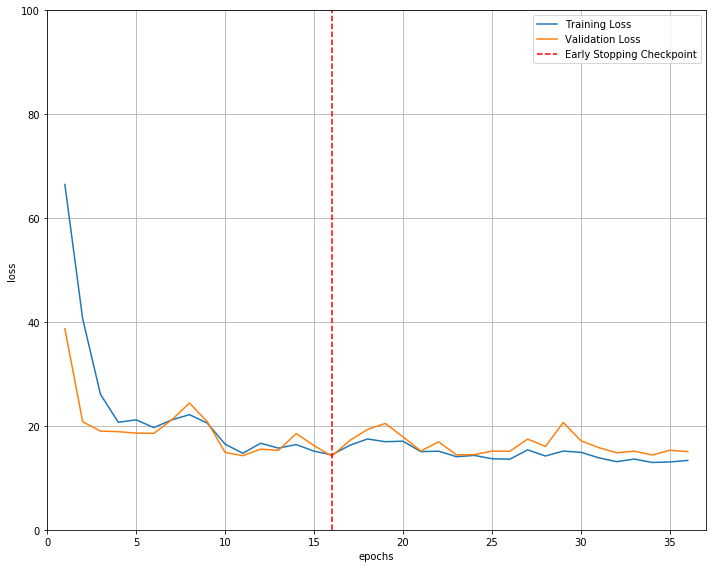

In [5]:
# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

# find position of lowest validation loss
minposs = valid_loss.index(min(valid_loss))+1 
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 100) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

In [8]:
def test(net):
    data = pd.read_excel(open(testpath, 'rb'), sheet_name = 'Sheet1', header = None)
    data = torch.from_numpy( np.array(data) ).float()
    data = data.reshape(-1,1,64,64)

    #labels = pd.read_excel(open(testpath, 'rb'), sheet_name = 'Sheet2', header = None)
    #labels = torch.from_numpy( np.array(labels) ).float()

    with torch.no_grad():
            test_size = len(data)
            predict = net(data)

            #error = predict - labels
            #relative_error = error / labels

            pred_df = DataFrame(predict.numpy())
            pred_df.to_csv('prediction.csv')

            #rel_df = DataFrame(relative_error.numpy())
            #rel_df.to_csv('error.csv')

In [9]:
test(net)